# RIDGE REGRESSION IMPLEMENTATION

## ` Matrix Equation Approach `
### $$W_{L2} = (X^{T}X + \lambda I)^{-1}Xy$$

## `Gradient Descend Approach`
### $$ w_{j} = w_{j} - \eta[-2\sum \limits _{i=1} ^{m} (x_{j}^{(i)})(y^{(i)} - h_{w}(x^{(i)}))+ 2\lambda w_{j}]$$
- $\lambda$ - regularization coefficient
- $\eta$ - learning rate

In [1]:
import numpy as np
import pandas as pd

In [2]:
class RidgeRegression: 
    
    def __init__(self, data, features, target, learning_rate=1e-13, l2=0.0, n_rounds=100):
        X = np.array(data[features])
        y = data[target]
        n = len(X)
        
        X = np.append(np.ones((n,1)), X, axis=1)
        self.weights = np.zeros(X.shape[1])
        self.costHistory = np.zeros(n_rounds)

        self.fit(X, y, self.weights, learning_rate, l2, n_rounds)
                      
    def costFuction(self, X, y, theta):
        '''Mean Square Error'''
        m = y.shape[0]
        return np.sum((y - X @ theta)**2) / m
    
    def predict(self, X):
        X = np.array(X)
        n = len(X)
        X = np.append(np.ones((n,1)), X, axis=1)
        
        return X @ self.weights
    
    def fit(self, X, y, weights, learning_rate, l2, n_rounds):
        iteration = 0
        
        while(iteration < n_rounds):
            for j in range(len(weights)):
                if(j == 0): # do not penalize intercept
                    grad = -2 * (X[:,j] @ (y - (X @ weights)))
                else:
                    grad = -2 * (X[:,j] @ (y - (X @ weights))) + (2 * l2 * weights[j])
                    
                weights[j] = weights[j] - (learning_rate * grad)
                self.costHistory[iteration] = (self.costFuction(X, y, weights))
                
            iteration += 1
        
        MSE = self.costFuction(X, y, weights)
        print(f"Training MSE: {MSE}")
        print(f"Training RMSE: {np.sqrt(MSE)}")
        print("Weights:", weights)
        self.weights = weights

In [3]:
sales_data = pd.read_csv("./data/house_data.csv")
train = sales_data.sample(frac=0.7, random_state=0) 
test = sales_data.drop(train.index)

In [4]:
sales_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
selected_features=["sqft_living","bedrooms","bathrooms","yr_built","floors", "sqft_above", "waterfront"]

## Train Linear Regression Model with no regularization

In [6]:
reg_model_no_l2 = RidgeRegression(train, features=selected_features, target="price", learning_rate=1e-11)

Training MSE: 70558196370.055
Training RMSE: 265627.92844513734
Weights: [ 2.00378710e-01  2.97279422e+02 -1.13808793e+00 -1.40066170e-01
 -2.78843621e+01  1.44832424e-01 -1.31251028e+01  1.75620735e-01]


## Checking that gradient descent implemented correctly

Text(0, 0.5, 'MSE')

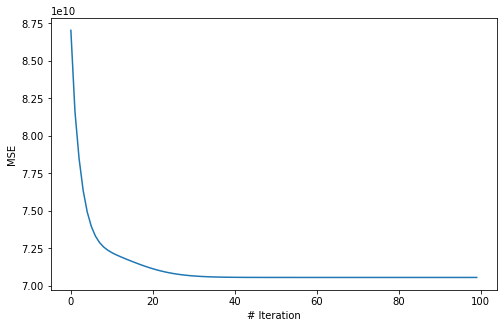

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(len(reg_model_no_l2.costHistory)), reg_model_no_l2.costHistory)
plt.xlabel("# Iteration")
plt.ylabel("MSE")

## Evaluate model performens with no regularization on test data set

In [8]:
from sklearn.metrics import mean_squared_error
MSE_no_l2 = mean_squared_error(y_true=test["price"], y_pred=reg_model_no_l2.predict(test[selected_features]))
RMSE_no_l2 = np.sqrt(MSE_no_l2)
print(f"Preformance evaluations without any regularization\nMSE:{MSE_no_l2}\nRMSE:{RMSE_no_l2}")

Preformance evaluations without any regularization
MSE:62803886758.1821
RMSE:250607.0365296675


## Train Linear Regression Model with L2 regularization

In [9]:
l2_high = 1e4
reg_model_high_l2 = RidgeRegression(train, features=selected_features, target="price", learning_rate=1e-11, l2=l2_high, n_rounds=150)

Training MSE: 70558161877.54218
Training RMSE: 265627.8635187622
Weights: [ 2.14214187e-01  2.97277558e+02 -1.63732122e+00 -1.56095845e-01
 -2.78792136e+01  2.01857401e-01 -1.31267323e+01  2.64369365e-01]


## Evaluate model performens with L2 regularization on test data set

In [10]:
MSE_l2 = mean_squared_error(y_true=test["price"], y_pred=reg_model_high_l2.predict(test[selected_features]))
RMSE_l2 = np.sqrt(MSE_l2)
print(f"Preformance evaluation with L2 regularization\nMSE:{MSE_l2}\nRMSE:{RMSE_l2}")

Preformance evaluation with L2 regularization
MSE:62803786501.54654
RMSE:250606.83650201274


## Compare MSE on Models with L2 regularization and without

In [11]:
MSE_no_l2 - MSE_l2 # Model with L2 regularization has lower Bias

100256.63555908203